In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')
print("Libraries Imported Successfully.")

Libraries Imported Successfully.


In [2]:
try:
    print("Loading Dataset 1 (Yield)...")
    df_yield = pd.read_csv('FAOSTAT_data_en.csv')
    
    print(f"Shape: {df_yield.shape}")
    print("Head:")
    display(df_yield.head())
except Exception as e:
    print(f"Error: {e}")

Loading Dataset 1 (Yield)...
Shape: (5940, 15)
Head:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,344434.0,A,Official figure,NaN
1,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,kg/ha,484.0,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,t,166692.0,A,Official figure,NaN
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,569271.0,A,Official figure,NaN
4,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,kg/ha,430.3,A,Official figure,NaN


In [3]:
try:
    print("Loading Dataset 2 (Soil)...")
    df_soil = pd.read_csv('Crop_recommendation.csv')
    
    print(f"Shape: {df_soil.shape}")
    print("Head:")
    display(df_soil.head())
except Exception as e:
    print(f"Error: {e}")

Loading Dataset 2 (Soil)...
Shape: (2200, 8)
Head:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
try:
    print("Filtering for India and Yield Element...")
    df_yield_clean = df_yield[
         (df_yield['Area'] == 'India') 
    ].copy()


    
    
    print(f"Filtered Shape: {df_yield_clean.shape}")
    display(df_yield_clean.head())
except Exception as e:
    print(f"Error: {e}")

Filtering for India and Yield Element...
Filtered Shape: (5940, 15)


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,344434.0,A,Official figure,NaN
1,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,kg/ha,484.0,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,t,166692.0,A,Official figure,NaN
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,569271.0,A,Official figure,NaN
4,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,kg/ha,430.3,A,Official figure,NaN


In [5]:
try:
    print("Data BEFORE Explosion...")
    mixed_crop_example = df_yield_clean[df_yield_clean['Item'].str.contains(',')].head(1)
    
    if not mixed_crop_example.empty:
        print("Example of a cell with multiple/mixed data:")
        display(mixed_crop_example)
    else:
        print("No mixed cells found in head, showing general head:")
        display(df_yield_clean.head())
        
    print(f"Total Rows Before: {df_yield_clean.shape[0]}")
except Exception as e:
    print(f"Error: {e}")

Data BEFORE Explosion...
Example of a cell with multiple/mixed data:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,344434.0,A,Official figure,NaN


Total Rows Before: 5940


In [6]:
try:
    print("Performing Explosion Logic...")
    
    df_yield_clean['Item_List'] = df_yield_clean['Item'].str.replace(' and ', ',')
    df_yield_clean['Item_List'] = df_yield_clean['Item_List'].str.split(',')
    
    df_exploded = df_yield_clean.explode('Item_List')
    df_exploded['Item'] = df_exploded['Item_List'].str.strip()
    
    print("Explosion Complete.")
except Exception as e:
    print(f"Error: {e}")

Performing Explosion Logic...
Explosion Complete.


In [7]:
try:
    print("Data AFTER Explosion...")
    
    print(f"Total Rows After: {df_exploded.shape[0]}")
    print("(Rows increased because split items are now on separate lines)")
    
    print("Sample of Exploded Data:")
    display(df_exploded.head())
except Exception as e:
    print(f"Error: {e}")

Data AFTER Explosion...
Total Rows After: 10519
(Rows increased because split items are now on separate lines)
Sample of Exploded Data:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Item_List
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,Anise,2000,2000,ha,344434.0,A,Official figure,NaN,Anise
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,badian,2000,2000,ha,344434.0,A,Official figure,NaN,badian
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,coriander,2000,2000,ha,344434.0,A,Official figure,NaN,coriander
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,cumin,2000,2000,ha,344434.0,A,Official figure,NaN,cumin
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,caraway,2000,2000,ha,344434.0,A,Official figure,NaN,caraway


In [8]:
try:
    print("Preparing Keys for Merging...")
    df_exploded['Join_Key'] = df_exploded['Item'].str.lower()
    df_soil['Join_Key'] = df_soil['label'].str.lower().str.strip()
    
    print("Keys created successfully...")
except Exception as e:
    print(f"Error: {e}")

Preparing Keys for Merging...
Keys created successfully...


In [9]:
try:
    print("Merging Datasets...")
    
    final_df = pd.merge(
        df_exploded,
        df_soil,
        on='Join_Key',
        how='left'
    )
    
    if 'label' in final_df.columns:
        final_df.drop(columns=['label'], inplace=True)

    final_df.rename(columns={'Item': 'label'}, inplace=True)

    target_cols = ['Element', 'Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
    final_df = final_df[target_cols]
    
    print(f"Merged Shape: {final_df.shape}")
    print("Columns:", final_df.columns.tolist())
    
    display(final_df.head())

except Exception as e:
    print(f"Error in Cell 9: {e}")


Merging Datasets...
Merged Shape: (39031, 10)
Columns: ['Element', 'Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


,Element,Value,N,P,K,temperature,humidity,ph,rainfall,label
0,Area harvested,344434.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anise
1,Area harvested,344434.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,badian
2,Area harvested,344434.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,coriander
3,Area harvested,344434.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cumin
4,Area harvested,344434.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,caraway


In [10]:
try:
    print("Filtering Element Column...")
    
    print("Elements present before filtering:")
    print(final_df['Element'].unique())

    final_df = final_df[final_df['Element'] == 'Production'].copy()
    
    
    print("Elements present after filtering:")
    print(final_df['Element'].unique())
    
    print(f"\nFiltered Data Shape (Production Only): {final_df.shape}")
    

except Exception as e:
    print(f"Error: {e}")

Filtering Element Column...
Elements present before filtering:
['Area harvested' 'Yield' 'Production']
Elements present after filtering:
['Production']

Filtered Data Shape (Production Only): (13128, 10)


In [11]:
try:
    print("Checking Null Values:")
    print(final_df.isnull().sum())
    
    print("\nFilling Nulls with Average Values...")
    soil_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    for col in soil_cols:
        final_df[col] = final_df[col].fillna(final_df[col].mean())
        
    print("Nulls Remaining:")
    print(final_df.isnull().sum().sum())
except Exception as e:
    print(f"Error: {e}")

Checking Null Values:
Element           0
Value           191
N              3528
P              3528
K              3528
temperature    3528
humidity       3528
ph             3528
rainfall       3528
label             0
dtype: int64

Filling Nulls with Average Values...
Nulls Remaining:
191


In [12]:
try:
    print("Checking Duplicates...")
    dupes = final_df.duplicated().sum()
    print(f"Duplicates found: {dupes}")
    
    if dupes > 0:
        final_df = final_df.drop_duplicates()
        print("Duplicates Dropped.")
    
    print(f"Final Shape: {final_df.shape}")
except Exception as e:
    print(f"Error: {e}")

Checking Duplicates...
Duplicates found: 369
Duplicates Dropped.
Final Shape: (12759, 10)


Visualizing Outliers:


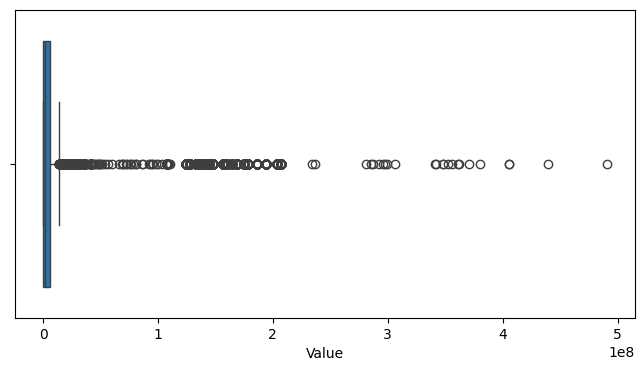

Shape after removing outliers: (10042, 10)
Clean Data Saved.


In [13]:
try:
    print("Visualizing Outliers:")
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=final_df['Value'])
    plt.show()

    Q1 = final_df['Value'].quantile(0.25)
    Q3 = final_df['Value'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    final_df = final_df[(final_df['Value'] >= lower_bound) & (final_df['Value'] <= upper_bound)]
    print(f"Shape after removing outliers: {final_df.shape}")
    
    final_df.to_csv('Final_Agri_Data.csv', index=False)
    print("Clean Data Saved.")
except Exception as e:
    print(f"Error: {e}")

Generating Correlation Heatmap...


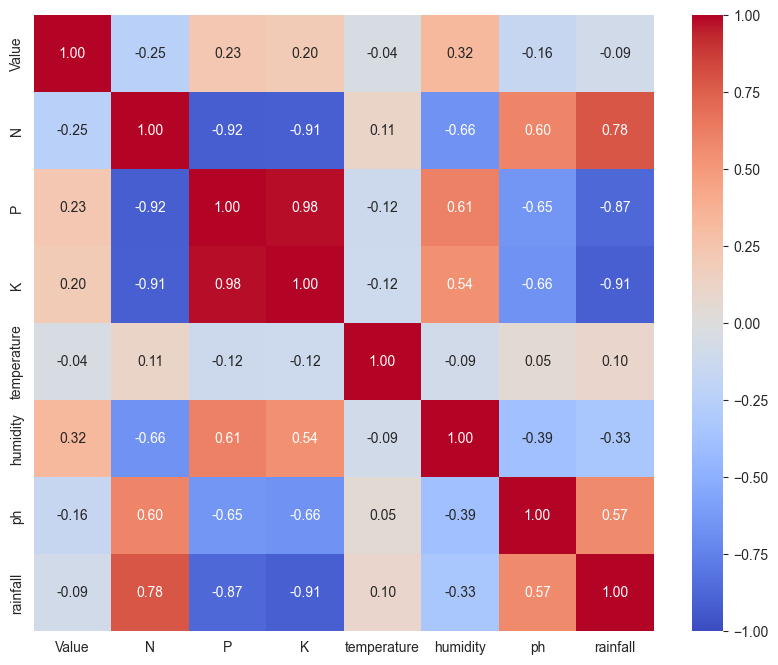

In [14]:
try:
    print("Generating Correlation Heatmap...")
    sns.set_style("whitegrid")
    
    plt.figure(figsize=(10, 8))
    eda_cols = ['Value'] + soil_cols
    sns.heatmap(final_df[eda_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.show()
except Exception as e:
    print(f"Error: {e}")

Generating Yield Bar Chart...


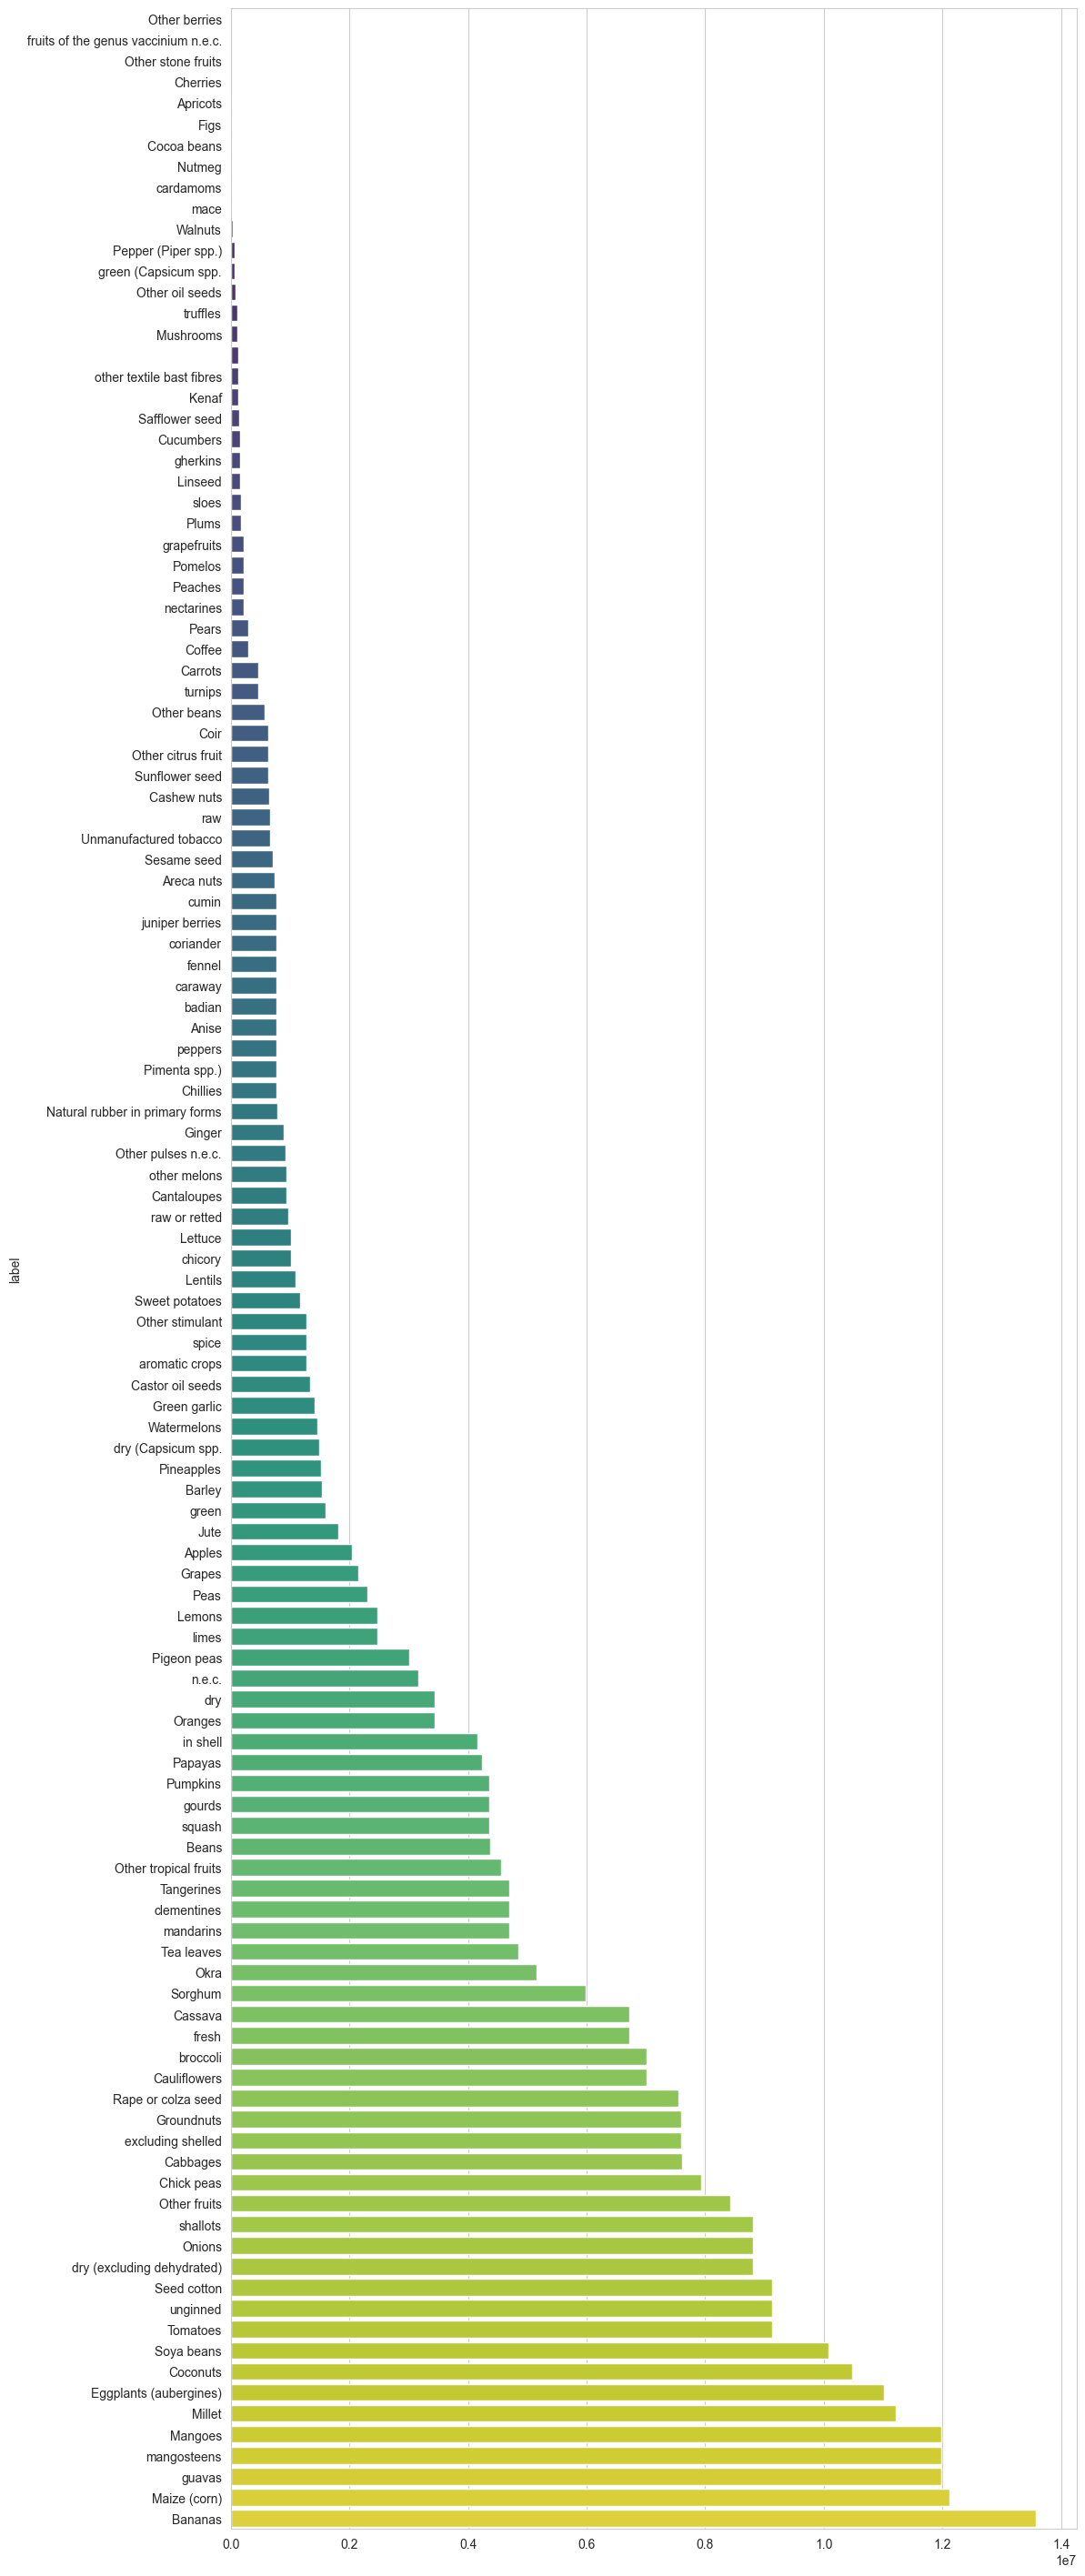

In [15]:
try:
    print("Generating Yield Bar Chart...")
    avg_yields = final_df.groupby('label')['Value'].mean().sort_values()
    
    plt.figure(figsize=(12, max(8, len(avg_yields) * 0.3)))
    sns.barplot(y=avg_yields.index, x=avg_yields.values, palette='viridis', hue=avg_yields.index, legend=False)
    plt.show()
except Exception as e:
    print(f"Error: {e}")